# Battle of Neighborhoods

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import requests 
 

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [3]:
pip install BeautifulSoup4


     |████████████████████████████████| 112kB 16.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
from bs4 import BeautifulSoup

In [10]:
import sys
!{sys.executable} -m pip install geocoder

In [11]:
!conda install -c conda-forge geopy --yes 


Solving environment: done

# All requested packages already installed.



## Introduction

## Background

Barcelona is recognized as a global city for its cultural, touristic and financial importance. There are more than 3.5 million of tourist coming to the city each year. But, apart from going for a holiday, there is also a large number of people that move to this city to look for job opportunities. 

## Business problem

From my experience living in this city, I have realized that there is a large community of italians in Barcelona. From my point of view, this can be due to the similarity between spanish and italian culture, what makes attractive to this group of people to move to this catalan city. Nevertheless, I am sure that some italians will prefer to live in a neighborhood with a strong presence of italian culture. For this reason, I though that it could be useful to study which borough and which neighborhood has a stronger presence of italian culture. To do so, I will analyze the number of italian restaurants in each place, and from this data, I will derive the conclusion.

## Acquisition of data

1. The database used is from the Catalan gouvernment page. It contains the name of the Boroughs of Barcelona as well as its neighborhoods. Nevertheless, I didn't find a database with the altitude and latitude included so I will have to add this data after. 

In [5]:
filename = 'districtes_i_barris_170705.csv'
#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)
pdf.head()

Shape of dataset:  (73, 4)


,CODI_DISTRICTE,NOM_DISTRICTE,CODI_BARRI,NOM_BARRI
0,1,Ciutat Vella,1,el Raval
1,1,Ciutat Vella,2,el Barri Gòtic
2,1,Ciutat Vella,3,la Barceloneta
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera"
4,2,Eixample,5,el Fort Pienc


### Cleaning of data

The database is in Catalan so I will translate the features to english. 

In [6]:
pdf.columns=['Borough_ID', 'Borough', 'Neighborhood_ID','Neighborhood']
pdf["Latitude"]=""
pdf["Longitude"]=""
pdf.head()

,Borough_ID,Borough,Neighborhood_ID,Neighborhood,Latitude,Longitude
0,1,Ciutat Vella,1,el Raval,,
1,1,Ciutat Vella,2,el Barri Gòtic,,
2,1,Ciutat Vella,3,la Barceloneta,,
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",,
4,2,Eixample,5,el Fort Pienc,,


I drop the name of neighborhoods that were redundant and the columns that were useless for our problem. 

In [7]:
pdf=pdf.drop(['Borough_ID', 'Neighborhood_ID'], axis=1)
pdf.Neighborhood[3]='Sant Pere'
pdf.Neighborhood[21]='Vallvidrera'
pdf

,Borough,Neighborhood,Latitude,Longitude
0,Ciutat Vella,el Raval,,
1,Ciutat Vella,el Barri Gòtic,,
2,Ciutat Vella,la Barceloneta,,
3,Ciutat Vella,Sant Pere,,
4,Eixample,el Fort Pienc,,
...,...,...,...,...
68,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,,
69,Sant Martí,el Besòs i el Maresme,,
70,Sant Martí,Provençals del Poblenou,,
71,Sant Martí,Sant Martí de Provençals,,


I add the altitude and longitude of each neighborhood using a geocode

In [8]:
from  geopy.geocoders import Nominatim
geolocator = Nominatim()
city ="Barcelona"
country ="Spain"
data=0
for data in range (73):
    borough1=pdf.Borough[data]
    neighborhood1=pdf.Neighborhood[data]
    loc = geolocator.geocode(neighborhood1 + ','+ borough1 +','+ city+','+ country)
    pdf.Latitude[data]= loc.latitude 
    pdf.Longitude[data]=loc.longitude
pdf

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


,Borough,Neighborhood,Latitude,Longitude
0,Ciutat Vella,el Raval,41.3795,2.16837
1,Ciutat Vella,el Barri Gòtic,41.3834,2.17691
2,Ciutat Vella,la Barceloneta,41.3807,2.18993
3,Ciutat Vella,Sant Pere,41.3883,2.17741
4,Eixample,el Fort Pienc,41.3959,2.18232
...,...,...,...,...
68,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,41.4032,2.21338
69,Sant Martí,el Besòs i el Maresme,41.415,2.21388
70,Sant Martí,Provençals del Poblenou,41.4124,2.20489
71,Sant Martí,Sant Martí de Provençals,41.4165,2.19897


To have an approximate idea of how the borough and the neighborhoods are structured I will plot a bar char. 

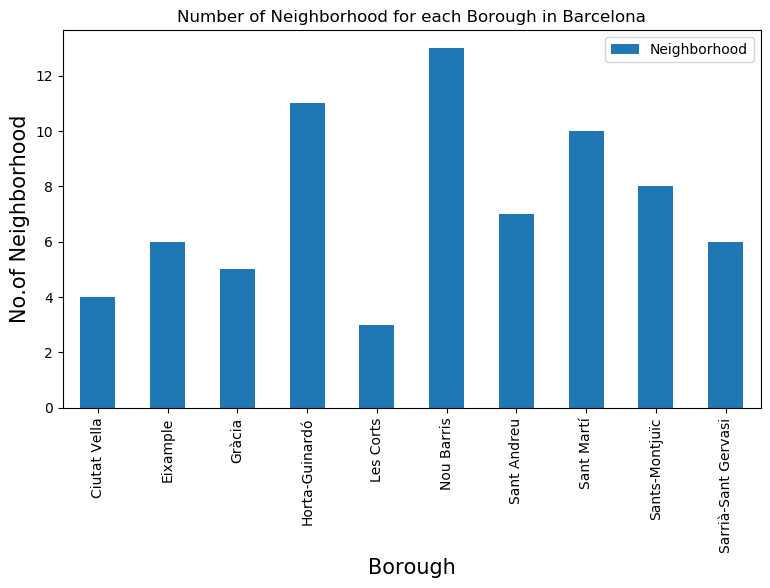

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Barcelona')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
pdf.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We see that the maximum number of neighborhood for Borough is 13 (Nou Barris) and the minimum is 3 (Les Corts). This data can give us an idea of how to process the data later. 

2. The second source of data will be Foursquare to find the nearby venues of each neighborhood in order to determine the number of italian restaurants and solve the business question

## Exploratory Data Analysis

To start, we plot a map of all the neighborhoods in Barcelona to have an idea of how are distributed. 

In [3]:
address = 'Barcelona, ES'
geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barcelona are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Barcelona are 41.3828939, 2.1774322.


In [9]:
map_bcn = folium.Map(location=[latitude, longitude], zoom_start=12)
for lat, lng, borough, Neighborhood in zip(pdf['Latitude'], pdf['Longitude'], pdf['Borough'],pdf['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bcn)  
    
map_bcn

Now, we will use Foursquare to obtain the nearby venues on each neighborhood. 

In [20]:
#Get the data from Foursqure 
CLIENT_ID = 'S0PWMD5GYQFMEIPWXSKV30JCD41E2N2E0SNDIDOMMIJSPRKM' # your Foursquare ID
CLIENT_SECRET = 'TEOZAZDTLH05ZZ4M1LRM4T0LCO2ZZCFSGOX4AQIPXKZY5KKQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: S0PWMD5GYQFMEIPWXSKV30JCD41E2N2E0SNDIDOMMIJSPRKM
CLIENT_SECRET:TEOZAZDTLH05ZZ4M1LRM4T0LCO2ZZCFSGOX4AQIPXKZY5KKQ


In [21]:
pdf.loc[0, 'Neighborhood']
neighborhood_latitude = pdf.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = pdf.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = pdf.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of el Raval are 41.3795176, 2.1683678.


In [22]:
LIMIT =100
radius=500
URL=  'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
URL


'https://api.foursquare.com/v2/venues/explore?&client_id=S0PWMD5GYQFMEIPWXSKV30JCD41E2N2E0SNDIDOMMIJSPRKM&client_secret=TEOZAZDTLH05ZZ4M1LRM4T0LCO2ZZCFSGOX4AQIPXKZY5KKQ&v=20180605&ll=41.3795176,2.1683678&radius=500&limit=100'

In [23]:
results = requests.get(URL).json()

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
Bcn_venues = getNearbyVenues(names=pdf['Neighborhood'],
                                   latitudes=pdf['Latitude'],
                                   longitudes=pdf['Longitude'])


el Raval
el Barri Gòtic
la Barceloneta
Sant Pere
el Fort Pienc
la Sagrada Família
la Dreta de l'Eixample
l'Antiga Esquerra de l'Eixample
la Nova Esquerra de l'Eixample
Sant Antoni
el Poble Sec
la Marina del Prat Vermell
la Marina de Port
la Font de la Guatlla
Hostafrancs
la Bordeta
Sants - Badal
Sants
les Corts
la Maternitat i Sant Ramon
Pedralbes
Vallvidrera
Sarrià
les Tres Torres
Sant Gervasi - la Bonanova
Sant Gervasi - Galvany
el Putxet i el Farró
Vallcarca i els Penitents
el Coll
la Salut
la Vila de Gràcia
el Camp d'en Grassot i Gràcia Nova
el Baix Guinardó
Can Baró
el Guinardó
la Font d'en Fargues
el Carmel
la Teixonera
Sant Genís dels Agudells
Montbau
la Vall d'Hebron
la Clota
Horta
Vilapicina i la Torre Llobeta
Porta
el Turó de la Peira
Can Peguera
la Guineueta
Canyelles
les Roquetes
Verdun
la Prosperitat
la Trinitat Nova
Torre Baró
Ciutat Meridiana
Vallbona
la Trinitat Vella
Baró de Viver
el Bon Pastor
Sant Andreu
la Sagrera
el Congrés i els Indians
Navas
el Camp de l'Arpa del

In [72]:
Bcn_venues.shape

(2901, 7)

In this table we see all the venues with their category and divided between the neighborhoods

In [26]:
Bcn_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,el Raval,41.379518,2.168368,La Robadora,41.379500,2.170463,Gastropub
1,el Raval,41.379518,2.168368,Chulapio,41.379264,2.165905,Cocktail Bar
2,el Raval,41.379518,2.168368,Robadors 23,41.379581,2.170603,Jazz Club
3,el Raval,41.379518,2.168368,Las Fernández,41.378183,2.166354,Mediterranean Restaurant
4,el Raval,41.379518,2.168368,Cera 23,41.378947,2.166180,Spanish Restaurant
5,el Raval,41.379518,2.168368,A Tu Bola,41.380096,2.169054,Tapas Restaurant
6,el Raval,41.379518,2.168368,Arume,41.378953,2.166008,Spanish Restaurant
7,el Raval,41.379518,2.168368,33/45,41.381059,2.167399,Cocktail Bar
8,el Raval,41.379518,2.168368,Guixot,41.378509,2.167806,Spanish Restaurant
9,el Raval,41.379518,2.168368,Grey Street,41.380848,2.166609,Gift Shop


There are 56 restaurants in total on Barcelona. 

In [27]:
Bcn_count=Bcn_venues['Venue Category'].value_counts().to_frame(name='Count')
Bcn_count.loc['Italian Restaurant']

Count    56
Name: Italian Restaurant, dtype: int64

We merge the two tables that we have obtained so far. 

In [28]:
BARCELONA_merged = pdf
BARCELONA_merged = BARCELONA_merged.join(Bcn_venues.set_index('Neighborhood'), on='Neighborhood')
BARCELONA_merged.head(5) 

,Borough,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ciutat Vella,el Raval,41.3795,2.16837,41.379518,2.168368,La Robadora,41.379500,2.170463,Gastropub
0,Ciutat Vella,el Raval,41.3795,2.16837,41.379518,2.168368,Chulapio,41.379264,2.165905,Cocktail Bar
0,Ciutat Vella,el Raval,41.3795,2.16837,41.379518,2.168368,Robadors 23,41.379581,2.170603,Jazz Club
0,Ciutat Vella,el Raval,41.3795,2.16837,41.379518,2.168368,Las Fernández,41.378183,2.166354,Mediterranean Restaurant
0,Ciutat Vella,el Raval,41.3795,2.16837,41.379518,2.168368,Cera 23,41.378947,2.166180,Spanish Restaurant


We group all the venues category by they borough they belong. 

In [29]:
pdf1=BARCELONA_merged.groupby('Borough')['Venue Category'].value_counts().to_frame()
pdf1

Venue Category
Borough             Venue Category                          
Ciutat Vella        Tapas Restaurant                      28
                    Hotel                                 21
                    Mediterranean Restaurant              21
                    Spanish Restaurant                    21
                    Bar                                   18
...                                                      ...
Sarrià-Sant Gervasi Swiss Restaurant                       1
                    Tea Room                               1
                    Toy / Game Store                       1
                    Tunnel                                 1
                    University                             1

[917 rows x 1 columns]

We create a new dataframe to count the number of italian restaurants in each borough. 

In [30]:
column_names = ['Borough', 'Italian'] 
italian = pd.DataFrame(columns=column_names)
italian

,Borough,Italian


We insert all the data into the dataframe. 

In [31]:
pdf2=pdf1.loc['Eixample']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
italian = italian.append({'Borough': 'Eixample',
                        'Italian': pdf4}, ignore_index=True)
pdf2=pdf1.loc['Gràcia']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
italian = italian.append({'Borough': 'Gràcia',
                        'Italian': pdf4}, ignore_index=True)
pdf2=pdf1.loc['Horta-Guinardó']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
italian = italian.append({'Borough': 'Horta-Guinardó',
                        'Italian': pdf4}, ignore_index=True)
pdf2=pdf1.loc['Les Corts']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
italian = italian.append({'Borough': 'Les Corts',
                        'Italian': pdf4}, ignore_index=True)
pdf2=pdf1.loc['Nou Barris']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
italian = italian.append({'Borough': 'Nou Barris',
                        'Italian': pdf4}, ignore_index=True)
pdf2=pdf1.loc['Sant Andreu']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
italian = italian.append({'Borough': 'Sant Andreu',
                        'Italian': pdf4}, ignore_index=True)
pdf2=pdf1.loc['Sant Martí']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
italian = italian.append({'Borough': 'Sant Martí',
                        'Italian': pdf4}, ignore_index=True)
pdf2=pdf1.loc['Sants-Montjuïc']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
italian = italian.append({'Borough': 'Sants-Montjuïc',
                        'Italian': pdf4}, ignore_index=True)
pdf2=pdf1.loc['Sarrià-Sant Gervasi']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
italian = italian.append({'Borough': 'Sarrià- Sant Gervasi',
                        'Italian': pdf4}, ignore_index=True)
pdf2=pdf1.loc['Ciutat Vella']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
italian = italian.append({'Borough': 'Ciutat Vella',
                        'Italian': pdf4}, ignore_index=True)
italian.reset_index(drop=True, inplace=True)
italian

,Borough,Italian
0,Eixample,8
1,Gràcia,2
2,Horta-Guinardó,3
3,Les Corts,3
4,Nou Barris,4
5,Sant Andreu,4
6,Sant Martí,13
7,Sants-Montjuïc,6
8,Sarrià- Sant Gervasi,7
9,Ciutat Vella,6


We plot the data we have just obtained. 

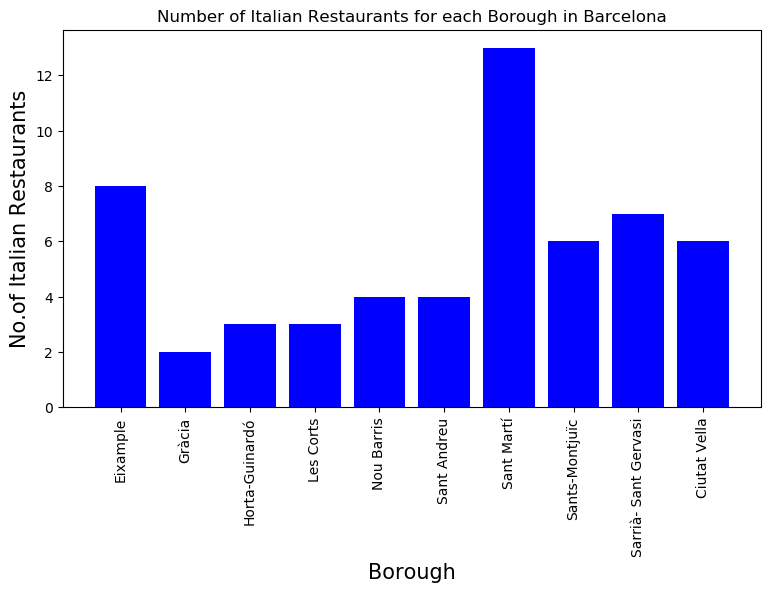

In [32]:
plt.figure(figsize=(9,5), dpi = 100)
plt.bar(italian.Borough, italian.Italian, color='blue')
plt.xticks(rotation='vertical')
plt.title('Number of Italian Restaurants for each Borough in Barcelona')
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Restaurants', fontsize=15)

plt.show()

From this graph we see that the borough with more Italian restaurants is Sant Martí. So, now we will analyze which neighborhood in Sant Martí has the more Italian restaurants to answer the original question. 

In [33]:
Italian_nei=BARCELONA_merged.groupby('Neighborhood')['Venue Category'].value_counts().to_frame()
Italian_nei

Venue Category
Neighborhood    Venue Category                  
Baró de Viver   Asian Restaurant               1
                Camera Store                   1
                Deli / Bodega                  1
                Dessert Shop                   1
                Food                           1
...                                          ...
les Tres Torres Pizza Place                    1
                Salad Place                    1
                Sports Club                    1
                Sushi Restaurant               1
                Train Station                  1

[1802 rows x 1 columns]

In [35]:
column_names = ['Neighborhood', 'ItalianRestaurant'] 
# instantiate the dataframe
italian_rest_nei = pd.DataFrame(columns=column_names)
italian_rest_nei

,Neighborhood,ItalianRestaurant


At this point I realized that it will be more accurate if instead of just looking for Italian Restaurants, I also took into account Pizza Place. I am conscious that this decision make not seem accurate to some italian people as it is difficult to know in which extend a Pizza Place like Telepizza can be considered part of the italian culture. 

In [38]:
pdf2=Italian_nei.loc['el Poblenou']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
pdf32=pdf2.loc['Pizza Place']
pdf42= pdf32['Venue Category']
italian_rest_nei = italian_rest_nei.append({'Neighborhood': 'el PobleNou',
                        'ItalianRestaurant': pdf4+pdf42}, ignore_index=True)

pdf2=Italian_nei.loc['el Parc i la Llacuna del Poblenou']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
pdf32=pdf2.loc['Pizza Place']
pdf42= pdf32['Venue Category']
italian_rest_nei = italian_rest_nei.append({'Neighborhood': 'el Parc i la Llacuna del Poblenou',
                        'ItalianRestaurant': pdf4+pdf42}, ignore_index=True)
pdf2=Italian_nei.loc['la Vila Olímpica del Poblenou']
pdf3=pdf2.loc['Italian Restaurant']
pdf4= pdf3['Venue Category']
italian_rest_nei = italian_rest_nei.append({'Neighborhood': 'la Vila Olímpica del Poblenou',
                        'ItalianRestaurant': pdf4}, ignore_index=True)
pdf2=Italian_nei.loc['el Clot']
pdf3=pdf2.loc['Pizza Place']
pdf4= pdf3['Venue Category']
italian_rest_nei = italian_rest_nei.append({'Neighborhood': 'el Clot',
                        'ItalianRestaurant': pdf4}, ignore_index=True)

italian_rest_nei = italian_rest_nei.append({'Neighborhood': 'Diagonal Mar i el Front Marítim del Poblenou',
                        'ItalianRestaurant': 0}, ignore_index=True)


italian_rest_nei = italian_rest_nei.append({'Neighborhood': 'el Besòs i el Maresme',
                        'ItalianRestaurant': 0}, ignore_index=True)


italian_rest_nei = italian_rest_nei.append({'Neighborhood': 'Provençals del Poblenou',
                        'ItalianRestaurant': 0}, ignore_index=True)

italian_rest_nei = italian_rest_nei.append({'Neighborhood': 'la Verneda i la Pau',
                        'ItalianRestaurant': 0}, ignore_index=True)

pdf2=Italian_nei.loc['Sant Martí de Provençals']
pdf3=pdf2.loc['Pizza Place']
pdf4= pdf3['Venue Category']
italian_rest_nei = italian_rest_nei.append({'Neighborhood': 'Sant Martí de Provençals ',
                        'ItalianRestaurant': pdf4}, ignore_index=True)

italian_rest_nei

,Neighborhood,ItalianRestaurant
0,el PobleNou,8
1,el Parc i la Llacuna del Poblenou,3
2,la Vila Olímpica del Poblenou,4
3,el Clot,2
4,Diagonal Mar i el Front Marítim del Poblenou,0
5,el Besòs i el Maresme,0
6,Provençals del Poblenou,0
7,la Verneda i la Pau,0
8,Sant Martí de Provençals,2
9,el PobleNou,8


We will plot in a bar chart the results that we have just obatined

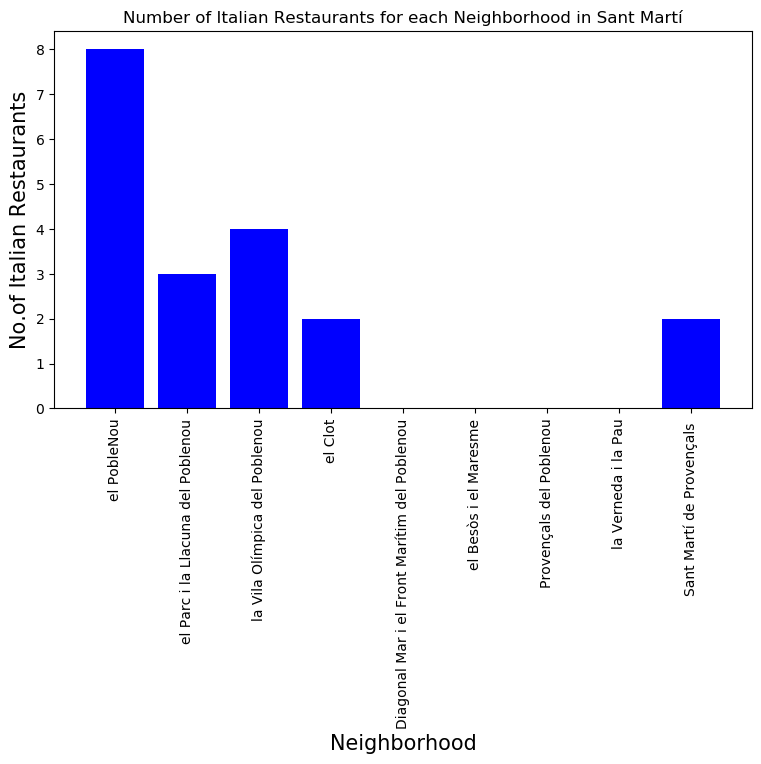

In [39]:
plt.figure(figsize=(9,5), dpi = 100)
plt.bar(italian_rest_nei.Neighborhood, italian_rest_nei.ItalianRestaurant, color='blue')
plt.xticks(rotation='vertical')
plt.title('Number of Italian Restaurants for each Neighborhood in Sant Martí')
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Italian Restaurants', fontsize=15)

plt.show()

We see that the Neighborhood in Sant Martí with more italian food options is el Poblenou. To proof our results and to investigate further, I thought that will be interesting to study who many people with italian nationality are each in borough of Barcelona. For this reason, I have upload a new dataset from the same source as the last one (Catalan gouvernement page) that contains the information we need to complete this analysis. 

In [53]:
filename = '2019_ine_nacionalitat_per_sexe.csv'
#Read csv
data = pd.read_csv(filename)
print ("Shape of dataset: ", data.shape)
data.head()

Shape of dataset:  (26280, 8)


,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Nacionalitat,Nombre
0,2019,1,Ciutat Vella,1,el Raval,Dona,Espanya,11666
1,2019,1,Ciutat Vella,2,el Barri Gòtic,Dona,Espanya,4214
2,2019,1,Ciutat Vella,3,la Barceloneta,Dona,Espanya,4801
3,2019,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Dona,Espanya,6570
4,2019,2,Eixample,5,el Fort Pienc,Dona,Espanya,13074


We put the columns in english and drop the ones that doesn't provide useful information for our study. 

In [54]:
data=data.drop(['Any', 'Codi_Districte', 'Codi_Barri'], axis=1)
data.columns=['Borough', 'Neighborhood', 'Sex','Nacionality', 'Number']
data.head()

,Borough,Neighborhood,Sex,Nacionality,Number
0,Ciutat Vella,el Raval,Dona,Espanya,11666
1,Ciutat Vella,el Barri Gòtic,Dona,Espanya,4214
2,Ciutat Vella,la Barceloneta,Dona,Espanya,4801
3,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Dona,Espanya,6570
4,Eixample,el Fort Pienc,Dona,Espanya,13074


In [56]:
data2=data.groupby('Borough')['Nacionality'].value_counts().to_frame()
data2

Nacionality
Borough             Nacionality                        
Ciutat Vella        Afganistan                        8
                    Albània                           8
                    Alemanya                          8
                    Algèria                           8
                    Altres països d'Europa            8
...                                                 ...
Sarrià-Sant Gervasi Xipre                            12
                    Zimbàbue                         12
                    Zàmbia                           12
                    Àustria                          12
                    Índia                            12

[1800 rows x 1 columns]

In [82]:
column_names = ['Borough', 'Num_Italians'] 
Num_italians = pd.DataFrame(columns=column_names)
Num_italians

,Borough,Num_Italians


In [83]:
pdf2=data2.loc['Eixample']
pdf3=pdf2.loc['Itàlia']
pdf4= pdf3['Nacionality']
Num_italians = Num_italians.append({'Borough': 'Eixample',
                        'Num_Italians': pdf4}, ignore_index=True)
pdf2=data2.loc['Gràcia']
pdf3=pdf2.loc['Itàlia']
pdf4= pdf3['Nacionality']
Num_italians = Num_italians.append({'Borough': 'Gràcia',
                        'Num_Italians': pdf4}, ignore_index=True)
pdf2=data2.loc['Horta-Guinardó']
pdf3=pdf2.loc['Itàlia']
pdf4= pdf3['Nacionality']
Num_italians = Num_italians.append({'Borough': 'Horta-Guinardó',
                        'Num_Italians': pdf4}, ignore_index=True)
pdf2=data2.loc['Les Corts']
pdf3=pdf2.loc['Itàlia']
pdf4= pdf3['Nacionality']
Num_italians = Num_italians.append({'Borough': 'Les Corts',
                        'Num_Italians': pdf4}, ignore_index=True)
pdf2=data2.loc['Nou Barris']
pdf3=pdf2.loc['Itàlia']
pdf4= pdf3['Nacionality']
Num_italians = Num_italians.append({'Borough': 'Nou Barris',
                        'Num_Italians': pdf4}, ignore_index=True)
pdf2=data2.loc['Sant Andreu']
pdf3=pdf2.loc['Itàlia']
pdf4= pdf3['Nacionality']
Num_italians = Num_italians.append({'Borough': 'Sant Andreu',
                        'Num_Italians': pdf4}, ignore_index=True)
pdf2=data2.loc['Sant Martí']
pdf3=pdf2.loc['Itàlia']
pdf4= pdf3['Nacionality']
Num_italians = Num_italians.append({'Borough': 'Sant Martí',
                        'Num_Italians': pdf4}, ignore_index=True)
pdf2=data2.loc['Sants-Montjuïc']
pdf3=pdf2.loc['Itàlia']
pdf4= pdf3['Nacionality']
Num_italians = Num_italians.append({'Borough': 'Sants-Montjuïc',
                        'Num_Italians': pdf4}, ignore_index=True)
pdf2=data2.loc['Sarrià-Sant Gervasi']
pdf3=pdf2.loc['Itàlia']
pdf4= pdf3['Nacionality']
Num_italians = Num_italians.append({'Borough': 'Sarrià- Sant Gervasi',
                        'Num_Italians': pdf4}, ignore_index=True)
pdf2=data2.loc['Ciutat Vella']
pdf3=pdf2.loc['Itàlia']
pdf4= pdf3['Nacionality']
Num_italians = Num_italians.append({'Borough': 'Ciutat Vella',
                        'Num_Italians': pdf4}, ignore_index=True)
Num_italians.reset_index(drop=True, inplace=True)
Num_italians

,Borough,Num_Italians
0,Eixample,12
1,Gràcia,10
2,Horta-Guinardó,22
3,Les Corts,6
4,Nou Barris,26
5,Sant Andreu,14
6,Sant Martí,20
7,Sants-Montjuïc,16
8,Sarrià- Sant Gervasi,12
9,Ciutat Vella,8


We plot the results we have obtained in a bar chart. 

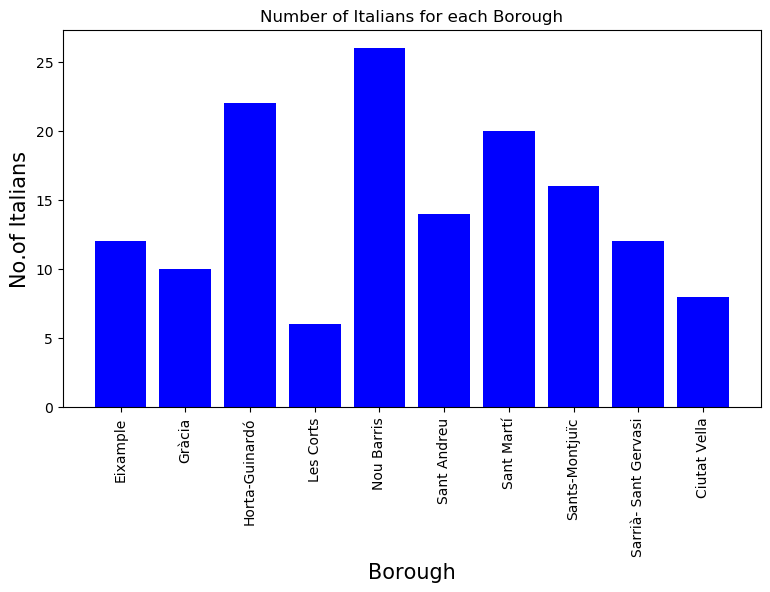

In [86]:
plt.figure(figsize=(9,5), dpi = 100)
plt.bar(Num_italians.Borough, Num_italians.Num_Italians, color='blue')
plt.xticks(rotation='vertical')
plt.title('Number of Italians for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Italians', fontsize=15)

plt.show()

## Conclusion

From all the visualization plots and analysis we have done, we can see that the neighborhood with more italian restaurants and Pizza places is el Poblenou, which can be found in the borough of Sant Martí. We also see that the presence of people with Italian nationality in Sant Martí is quite strong, which kinf of proofs our conclusion. Of course, the number of italian people is not a determining factor as there are a lot more things that should be taken into account before moving to a neighborhood. Therefore, answering the business question that has been raised at the beginning, the neighborhood with a stronger presence of italian culture is Poblenou.